In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
!ls

Kaggle_learning_tatanic.ipynb         logistic_regression_predictions.csv
SVC_rbf_predictions_more_features.csv test.csv
gender_submission.csv                 train.csv


In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

data_train.describe() ## NaN in Age


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## data info
### 1. 38% people survived 
### 2. 2/3 class have more people than 1 class
### 3. average age 29

## plot some general information

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


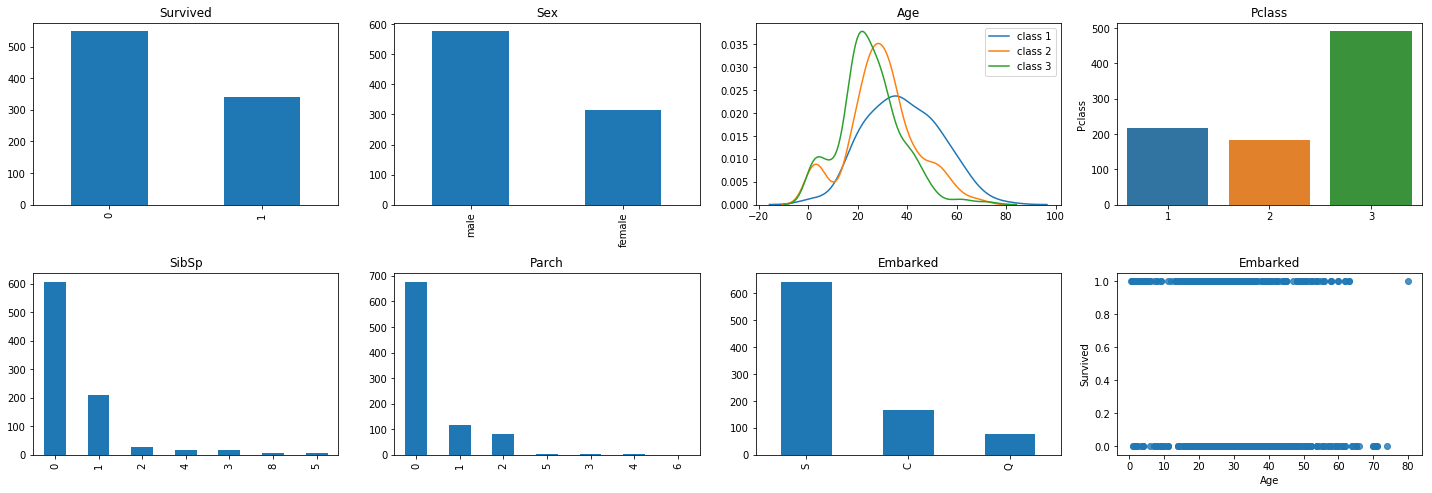

In [3]:
#sns.pairplot(x_vars=["Pclass","Sex","Age","SibSp","Parch","Embarked"],data=data_train)
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 4)
plt.subplot(gs[0])
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.subplot(gs[1])
data_train["Sex"].value_counts().plot(kind='bar')
plt.title('Sex')
plt.subplot(gs[2])
#plt.hist(data_train["Age"])
sns.kdeplot(data_train[data_train["Pclass"]== 1]["Age"],label='class 1')
sns.kdeplot(data_train[data_train["Pclass"]== 2]["Age"],label='class 2')
sns.kdeplot(data_train[data_train["Pclass"]== 3]["Age"],label='class 3')
plt.title('Age')
plt.subplot(gs[3])
pclass = data_train["Pclass"].value_counts()
sns.barplot(x=pclass.index,y=pclass)
plt.title('Pclass')
plt.subplot(gs[4])
data_train["SibSp"].value_counts().plot(kind='bar')
plt.title('SibSp')
plt.subplot(gs[5])
data_train["Parch"].value_counts().plot(kind='bar')
plt.title('Parch')
plt.subplot(gs[6])
data_train["Embarked"].value_counts().plot(kind='bar')
plt.title('Embarked')
plt.subplot(gs[7])
sns.regplot(y='Survived',x='Age',fit_reg=False,data=data_train)
plt.title('Embarked')

fig.tight_layout()


## Plot sth against Survived or not

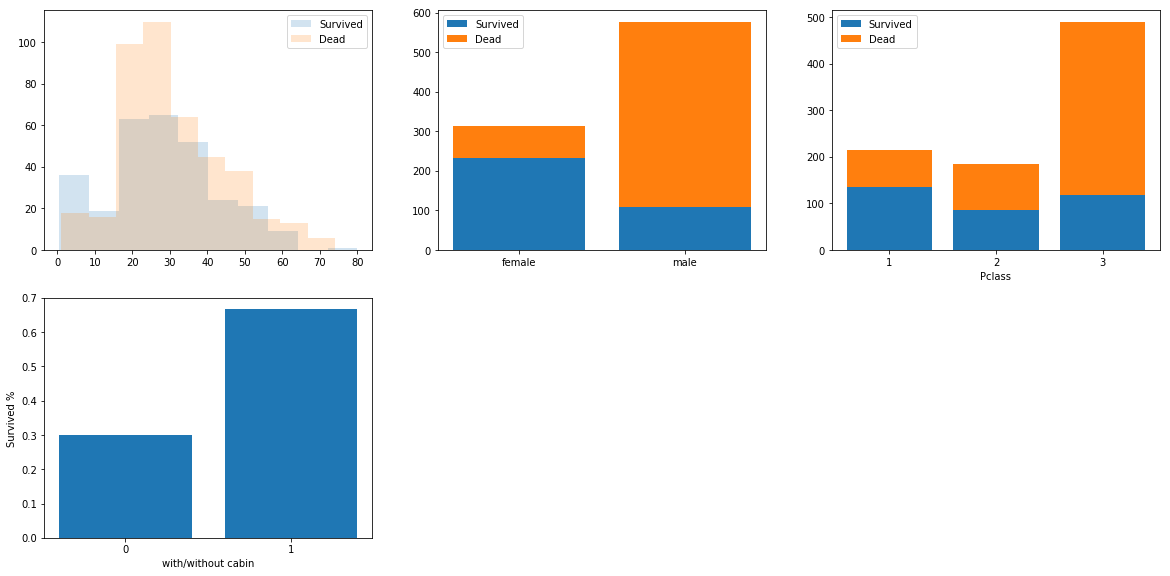

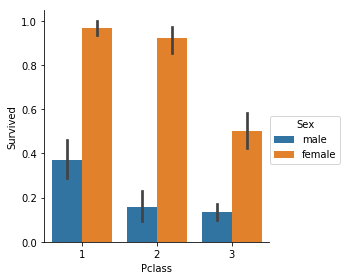

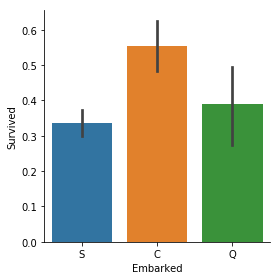

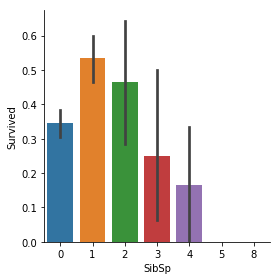

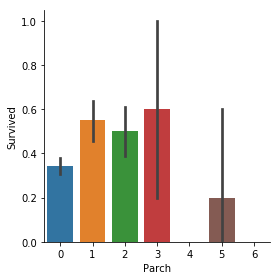

In [4]:
#sns.distplot(data_train["Parch"])
#sns.distplot(data_train[data_train["Survived"] == 1]["Age"])
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(3, 3)
plt.subplot(gs[0])
dSurvived = data_train[data_train["Survived"] == 1]
dUSurvived = data_train[data_train["Survived"] == 0]
plt.hist(dSurvived[~dSurvived["Age"].isnull()]["Age"],alpha=0.2,label='Survived')
plt.hist(dUSurvived[~dUSurvived["Age"].isnull()]["Age"],alpha=0.2,label='Dead')
plt.legend()
plt.subplot(gs[1])
#plt.bar(dSurvived[~dSurvived["Sex"].isnull()]["Sex"],alpha=0.2,label='Survived')
dSurvivedsex = dSurvived["Sex"].value_counts().sort_index()
dUSurvivedsex = dUSurvived["Sex"].value_counts().sort_index()
plt.bar(dSurvivedsex.index,dSurvivedsex,label='Survived')
plt.bar(dUSurvivedsex.index,dUSurvivedsex,bottom=dSurvivedsex,label='Dead')
plt.legend()
plt.subplot(gs[2])
dSurvivedPclass = dSurvived["Pclass"].value_counts().sort_index()
dSurvivedPclass.index = dSurvivedPclass.index.astype("str")
dUSurvivedPclass = dUSurvived["Pclass"].value_counts().sort_index()
dUSurvivedPclass.index = dUSurvivedPclass.index.astype("str")
plt.bar(dSurvivedPclass.index,dSurvivedPclass,label='Survived')
plt.bar(dUSurvivedPclass.index,dUSurvivedPclass,bottom=dSurvivedPclass,label='Dead')
plt.xlabel("Pclass")
plt.legend()
plt.subplot(gs[3])
data_train_t = data_train.copy()
data_train_t.loc[~data_train_t["Cabin"].isnull(),"Cabin"] = 1
data_train_t.loc[data_train_t["Cabin"].isnull(),"Cabin"] = 0
dft = pd.DataFrame(data_train_t.groupby("Cabin")["Survived"].mean())
dft.index = dft.index.astype("str")
plt.bar(dft.index,dft.iloc[:,0])
plt.ylabel("Survived %")
plt.xlabel("with/without cabin")

sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
                   size=4, kind="bar")
sns.factorplot(x="Embarked", y="Survived", data=data_train,
                   size=4, kind="bar")
sns.factorplot(x="SibSp", y="Survived", data=data_train,
                   size=4, kind="bar")
sns.factorplot(x="Parch", y="Survived", data=data_train,
                   size=4, kind="bar")


## Feature engineer
### 1. set missing ages

In [5]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(data_train_t):
    ## using 'Age','Fare', 'Parch', 'SibSp', 'Pclass' to predict age
    age_df = data_train_t[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    ## set known_age and unknown_age
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    y = known_age.iloc[:, 0]
    X = known_age.iloc[:, 1:]
    
    ## set model RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=2000,n_jobs=-1,random_state=0)
    rfr.fit(X,y)

    ## using constructed model to predicted NaN of ages
    predicted_age = rfr.predict(unknown_age.iloc[:, 1:])
    data_train_t.loc[data_train_t["Age"].isnull(),"Age"] = predicted_age
    return data_train_t, rfr

## chang cabin to Yes or No
def chang_cabin(data_train):
    data_train.loc[data_train["Cabin"].notnull(),"Cabin"] = "Yes"
    data_train.loc[data_train["Cabin"].isnull(),"Cabin"] = "No"
    return data_train

data_train, rfr = set_missing_ages(data_train)
data_train = chang_cabin(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


### 2. transform category in X to binary 

In [6]:
def getdummiesfordata(data_train):
    dummies_Sex = pd.get_dummies(data_train["Sex"],prefix="Sex")
    dummies_Cabin = pd.get_dummies(data_train["Cabin"],prefix="Cabin")
    dummies_Embarked = pd.get_dummies(data_train["Embarked"], prefix= 'Embarked')
    dummies_Pclass = pd.get_dummies(data_train["Pclass"], prefix= 'Pclass')
    
    df = pd.concat([data_train,dummies_Sex,dummies_Cabin,dummies_Embarked,dummies_Pclass], axis=1).drop(["Sex","Embarked","Pclass","Cabin"],axis=1)
    return df
df = getdummiesfordata(data_train)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,0,0,1,0,0,1


### 3. StandardScaler Fare and Age

In [7]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1,1))
#df = df.drop(["Age","Fare"],axis=1)

### 4. train model of clf

In [8]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
y = train_df["Survived"]
X = train_df.iloc[:,1:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [9]:
data_test = pd.read_csv("test.csv")

data_test = chang_cabin(data_test)

test_rfr = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
test_rfr = test_rfr[test_rfr["Age"].isnull()]
test_rfr_X =  test_rfr.iloc[:,1:]
data_test.loc[data_test["Age"].isnull(),"Age"] =  rfr.predict(test_rfr_X)
data_test = getdummiesfordata(data_test)

## use df.describe() check whether any NaN existed
data_test.loc[data_test["Fare"].isnull(),"Fare"] = 0

## just use scaler.transform not .fit (use model already trained)
data_test['Age_scaled'] = scaler.transform(np.array(data_test['Age']).reshape(-1,1))
data_test['Fare_scaled'] = scaler.transform(np.array(data_test['Fare']).reshape(-1,1))

test_df = data_test.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test_df)
results = pd.DataFrame({"PassengerId":data_test["PassengerId"],"Survived":predictions})
results.to_csv("logistic_regression_predictions.csv", index=False)

### 5. check coef

In [10]:
df_coef = pd.DataFrame({"Features":test_df.columns,"coef":list(clf.coef_.T)}) ##coef_ need .T 
df_coef["coef"] = df_coef["coef"].astype("float")
df_coef = df_coef.sort_values("coef",ascending=False)
df_coef

,Features,coef
2,Sex_female,1.956571
5,Cabin_Yes,0.902109
9,Pclass_1,0.341158
13,Fare_scaled,0.084435
4,Cabin_No,0.000000
6,Embarked_C,0.000000
7,Embarked_Q,0.000000
10,Pclass_2,0.000000
1,Parch,-0.104916
0,SibSp,-0.344236


### 6. using cross_validation to get score using training data

In [11]:
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
y = train_df["Survived"]
X = train_df.iloc[:,1:]
clf = linear_model.LogisticRegression(C=1, penalty='l1', tol=1e-6)
clf.fit(X,y)
cv_score = cross_validation.cross_val_score(clf,X,y,cv=5)
mean_cv_score = np.mean(cv_score)
mean_cv_score

/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.80357558922003691

#### Grid selection of values for logicregression

In [12]:
clf = linear_model.LogisticRegression(penalty='l1', tol=1e-6)
grid_values = {'C': [0.001,0.01,0.05,0.1,1,10,100]}

## use accuracy to select C
grid_clf_acc = GridSearchCV(clf,grid_values,cv=5)
grid_clf_acc.fit(X,y)
print("Grid best parameters (accuracy):",grid_clf_acc.best_params_)
print("Grid best score (accuracy):",grid_clf_acc.best_score_)


## use AUC to select C
grid_clf_auc = GridSearchCV(clf,grid_values,scoring="roc_auc",cv=5)
grid_clf_auc.fit(X,y)
print("Grid best parameters (AUC):",grid_clf_auc.best_params_)
print("Grid best score (AUC):",grid_clf_auc.best_score_)

## use AUC to select C
grid_clf_f1 = GridSearchCV(clf,grid_values,scoring="f1",cv=5)
grid_clf_f1.fit(X,y)
print("Grid best parameters (f1):",grid_clf_f1.best_params_)
print("Grid best score (f1):",grid_clf_f1.best_score_)


Grid best parameters (accuracy): {'C': 1}
Grid best score (accuracy): 0.803591470258
Grid best parameters (AUC): {'C': 0.1}
Grid best score (AUC): 0.854611029591


/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jzz0026/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jzz0026/anaconda3/lib/python3.6/site-packages

Grid best parameters (f1): {'C': 1}
Grid best score (f1): 0.733194056987


#### Grid selection of values for logicregression C and penalty

In [13]:
clf = linear_model.LogisticRegression()
grid_values = {'C': [0.001,0.01,0.05,0.1,1,10,100],'penalty':['l1','l2'],'tol':[1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]}

## use accuracy to select C
grid_clf_acc = GridSearchCV(clf,grid_values,cv=5)
grid_clf_acc.fit(X,y)
print("Grid best parameters (accuracy):",grid_clf_acc.best_params_)
print("Grid best score (accuracy):",grid_clf_acc.best_score_)

Grid best parameters (accuracy): {'C': 1, 'penalty': 'l1', 'tol': 1e-05}
Grid best score (accuracy): 0.803591470258


#### Grid selection of values for SVC (gamma and kernel)

In [14]:
from sklearn.svm import SVC
clf = SVC()
grid_values = {'gamma': [0.001,0.01,0.05,0.1,1,10,100],'kernel':['rbf','linear']}
grid_clf_svc1 = GridSearchCV(clf,grid_values,cv=5)
grid_clf_svc1.fit(X,y)
print("Grid best parameters (accuracy):",grid_clf_svc1.best_params_)
print("Grid best score (accuracy):",grid_clf_svc1.best_score_)

## select different degree
clf = SVC(kernel='poly')
grid_values = {'degree': [1,2,3,4,5,6,7,8,9,10]}
grid_clf_svc2 = GridSearchCV(clf,grid_values,cv=5)
grid_clf_svc2.fit(X,y)
print("Grid best parameters (accuracy):",grid_clf_svc2.best_params_)
print("Grid best score (accuracy):",grid_clf_svc2.best_score_)

Grid best parameters (accuracy): {'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (accuracy): 0.827160493827
Grid best parameters (accuracy): {'degree': 3}
Grid best score (accuracy): 0.817059483726


#### Grid selection of values for Decision Tree (max_depth and min_samples_leaf)

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
grid_values = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,15,16,17,18,19,20],'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,15,16,17,18,19,20]}
grid_clf_dtree = GridSearchCV(clf,grid_values,cv=5)
grid_clf_dtree.fit(X,y)

print("Grid best parameters (accuracy): ",grid_clf_dtree.best_params_)
print("Grid best score (accuracy): ",grid_clf_dtree.best_score_)



Grid best parameters (accuracy):  {'max_depth': 6, 'min_samples_leaf': 6}
Grid best score (accuracy):  0.822671156004


#### Grid selection of values for KNN (n_neighbors)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
grid_values = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,15,16,17,18,19,20]}
grid_clf_knn = GridSearchCV(clf,grid_values,cv=5)
grid_clf_knn.fit(X,y)

print("Grid best parameters (accuracy): ",grid_clf_knn.best_params_)
print("Grid best score (accuracy): ",grid_clf_knn.best_score_)

Grid best parameters (accuracy):  {'n_neighbors': 8}
Grid best score (accuracy):  0.818181818182


### 7. check bad cases

In [17]:
from sklearn.metrics import confusion_matrix

## split train and cv
split_train, split_cv = cross_validation.train_test_split(df,test_size=0.3,random_state=0)

## left Passenger Id of cv for late track back
PassengerId_cv = split_cv["PassengerId"]

## filter train_df and cv_df
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

## set and fit model of clf
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.iloc[:,1:],train_df.iloc[:,0]) ##train_df.iloc[:,0] is y, don't set train_df.iloc[:,1]

##predict and score
predictions = clf.predict(cv_df.iloc[:,1:])
#clf.score(cv_df.iloc[:,1:],cv_df.iloc[:,0])
#confusion_matrix(cv_df.iloc[:,0],predictions)

origin_data_train = pd.read_csv("Train.csv")

## check bad cases
origin_data_train_cv = origin_data_train.set_index("PassengerId").loc[PassengerId_cv]
#origin_data_train_cv = origin_data_train[origin_data_train["PassengerId"].isin(list(PassengerId_cv))] ##用isin表格重新按照index排序了
bad_cases = origin_data_train_cv[origin_data_train_cv["Survived"] != predictions]
bad_cases.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
475,0,3,"Strandberg, Miss. Ida Sofia",female,22.00,0,0,7553,9.8375,NaN,S
643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S


### plot bad cases

(array([ 22.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

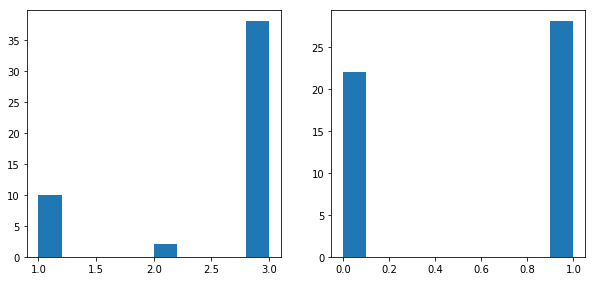

In [18]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.hist(bad_cases["Pclass"])
ax2 = plt.subplot(2,2,2)
ax2.hist(bad_cases["Survived"])

### 8. do more feature engineering

In [19]:
dfmf =  df.copy()
dfmf["Title"] = dfmf["Name"].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
df_title = pd.get_dummies(dfmf["Title"],prefix="Title")
dfmf = pd.concat([dfmf,df_title],axis=1)


dfmfDATA = dfmf.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Title_.*|kid|old')
dfmfDATA.columns

Index(['Survived', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Cabin_No',
       'Cabin_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Age_scaled', 'Fare_scaled', 'Title_ Capt',
       'Title_ Col', 'Title_ Don', 'Title_ Dr', 'Title_ Jonkheer',
       'Title_ Lady', 'Title_ Major', 'Title_ Master', 'Title_ Miss',
       'Title_ Mlle', 'Title_ Mme', 'Title_ Mr', 'Title_ Mrs', 'Title_ Ms',
       'Title_ Rev', 'Title_ Sir', 'Title_ the Countess'],
      dtype='object')

In [20]:
y = dfmfDATA.iloc[:,0]
X = dfmfDATA.iloc[:,1:]


clf = SVC()
grid_values = {'gamma': [0.001,0.01,0.05,0.1,1,10,100],'kernel':['rbf','linear']}
grid_clf_svc1 = GridSearchCV(clf,grid_values,cv=5)
grid_clf_svc1.fit(X,y)
print("SVC results:")
print("Grid best parameters (accuracy):",grid_clf_svc1.best_params_)
print("Grid best score (accuracy):",grid_clf_svc1.best_score_)

clf = linear_model.LogisticRegression(penalty='l1')
grid_values = {'C': [0.001,0.01,0.05,0.1,1,10,100]}
grid_clf_acc = GridSearchCV(clf,grid_values,cv=5)
grid_clf_acc.fit(X,y)
print("lasso classifier results:")
print("Grid best parameters (accuracy):",grid_clf_acc.best_params_)
print("Grid best score (accuracy):",grid_clf_acc.best_score_)

SVC results:
Grid best parameters (accuracy): {'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (accuracy): 0.837261503928
lasso classifier results:
Grid best parameters (accuracy): {'C': 1}
Grid best score (accuracy): 0.829405162738



Plotting Learning Curves

On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.



<module 'matplotlib.pyplot' from '/Users/jzz0026/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

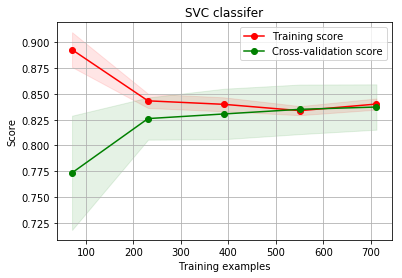

In [21]:
%run "/Users/jzz0026/OneDrive - Auburn University/supercomupter setting/python_programming/Machine_learning/plot_learning_curve.py"

plot_learning_curve(SVC(gamma=0.1,kernel='rbf'),title="SVC classifer", X=X, y=y,n_jobs=1, cv=5, train_sizes=np.linspace(.1, 1.0, 5))

### 9. Use all train data to build model

In [22]:

data_test["Title"] = data_test["Name"].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
data_test
df_title = pd.get_dummies(data_test["Title"],prefix="Title")
test_df = pd.concat([data_test,df_title],axis=1)


test_df_final = test_df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Title_.*')
test_df_final =test_df_final.loc[:,X.columns].fillna(0)

In [23]:
X.columns

Index(['SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Cabin_No', 'Cabin_Yes',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Age_scaled', 'Fare_scaled', 'Title_ Capt', 'Title_ Col',
       'Title_ Don', 'Title_ Dr', 'Title_ Jonkheer', 'Title_ Lady',
       'Title_ Major', 'Title_ Master', 'Title_ Miss', 'Title_ Mlle',
       'Title_ Mme', 'Title_ Mr', 'Title_ Mrs', 'Title_ Ms', 'Title_ Rev',
       'Title_ Sir', 'Title_ the Countess'],
      dtype='object')

In [24]:
clf = SVC(gamma=0.1,kernel='rbf')
clf.fit(X,y)
predictions = clf.predict(test_df_final)
results = pd.DataFrame({"PassengerId":data_test["PassengerId"],"Survived":predictions})
results.to_csv("SVC_rbf_predictions_more_features.csv", index=False)

### 10. model ensemble
### bagging + SVC

In [67]:
from sklearn.ensemble import BaggingClassifier
clf = SVC(gamma=0.1,kernel='rbf')
bagging_clf = BaggingClassifier(clf, n_estimators=500, max_samples=0.5, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=True,n_jobs=-1)
bagging_clf.fit(X,y)
bagging_clf.predict(test_df_final)
#results = pd.DataFrame({"PassengerId":data_test["PassengerId"],"Survived":predictions})
#results.to_csv("SVC_rbf_Bagging_predictions_more_features.csv", index=False)
bagging_clf.oob_score_

0.83389450056116721

### RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000)
grid_values={'max_depth':[8,9,10,11,12],'n_estimators':[10,50,100,200]}
grid_clf_rfc = GridSearchCV(clf,grid_values,cv=5)
grid_clf_rfc.fit(X,y)
print("Grid best parameters (f1):",grid_clf_rfc.best_params_)
print("Grid best score (f1):",grid_clf_rfc.best_score_)


Grid best parameters (f1): {'max_depth': 10, 'n_estimators': 10}
Grid best score (f1): 0.835016835017


### VotingClassifier

In [93]:
from sklearn.ensemble import VotingClassifier
rfc = RandomForestClassifier(n_estimators=10,max_depth=10)
dtc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6)
knn = KNeighborsClassifier(n_neighbors=8)
svck = SVC(gamma=0.1,kernel='rbf')
svcp = SVC(kernel='poly',degree=3)
lgr = linear_model.LogisticRegression(C=1, penalty='l1', tol=1e-6)
voting_clf = VotingClassifier(estimators=[('rf',rfc), ('svc',svck)],voting='hard')
voting_clf.fit(X,y)
results = pd.DataFrame({"PassengerId":data_test["PassengerId"],"Survived":predictions})
results.to_csv("Voting_rf_svc.csv", index=False)
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
